#This is the first Weekly Assignment (Weekly Assignment-1) from Indonesia AI Computer Vision Bootcamp Batch 2

##Lily Silva Ardiani - ADA LOVELACE Group

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [ ]:
plt.style.use('seaborn')

<ipython-input-2-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Exploratory Data Analysis

In [ ]:
df_train = pd.read_csv('train.csv', index_col='Id')
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test = pd.read_csv('test.csv', index_col='Id')
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_train.shape

(1460, 80)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df_test.shape

(1459, 79)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

Handle Missing Value

In [ ]:
missingcol = df_train.isna().sum()
missingcol = missingcol[missingcol>0]
missingcol.sort_values(ascending=False, inplace=True)

In [ ]:
len(missingcol)

19

<Axes: >

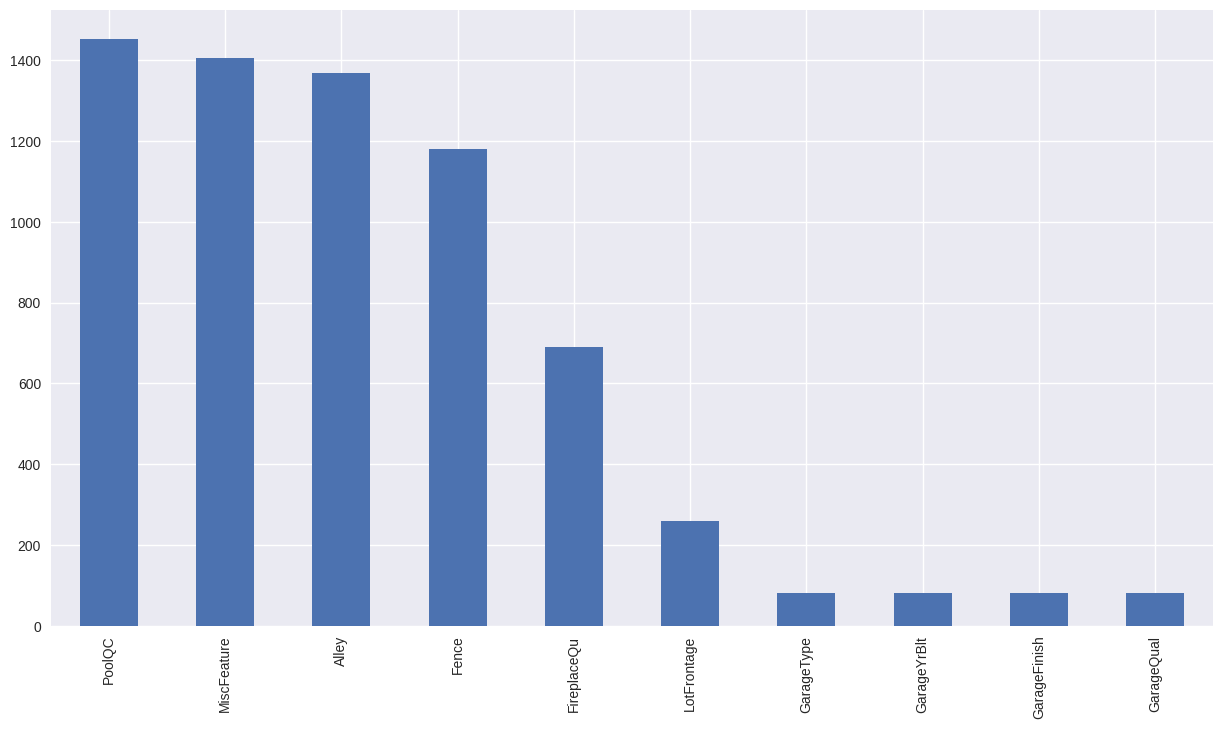

In [ ]:
plt.figure(figsize=(15,8))
missingcol[:10].plot(kind='bar')

In [ ]:
missingcol.index.values

array(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

Isi NAN

In [ ]:
df_train['PoolQC'] = df_train['PoolQC'].replace({np.nan: 'No pool'})
df_train['MiscFeature'] = df_train['MiscFeature'].replace({np.nan: 'No misc feature'})
df_train['Alley'] = df_train['Alley'].replace({np.nan: 'No alley'})
df_train['Fence'] = df_train['Fence'].replace({np.nan: 'No fence'})
df_train['FireplaceQu'] = df_train['FireplaceQu'].replace({np.nan: 'No fireplace'})
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)
df_train['GarageType'] = df_train['GarageType'].replace({np.nan: 'No garage type'})
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0)
df_train['GarageFinish'] = df_train['GarageFinish'].replace({np.nan: 'No garage finish'})
df_train['GarageQual'] = df_train['GarageQual'].replace({np.nan: 'No garage height'})
df_train['GarageCond'] = df_train['GarageCond'].replace({np.nan: 'No garage cond'})
df_train['BsmtExposure'] = df_train['BsmtExposure'].replace({np.nan: 'No basement exposure'})
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].replace({np.nan: 'No basement finish'})
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].replace({np.nan: 'No basement finish'})
df_train['BsmtCond'] = df_train['BsmtCond'].replace({np.nan: 'No basement cond'})
df_train['BsmtQual'] = df_train['BsmtQual'].replace({np.nan: 'No basement height'})
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_train['MasVnrType'] = df_train['MasVnrType'].replace({np.nan: 'No masonry'})
df_train['Electrical'] = df_train['Electrical'].replace({np.nan: 'No electrical'})


In [ ]:
df_train.isna().sum().sort_values(ascending=False)

MSSubClass     0
MSZoning       0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 80, dtype: int64

Numerical and Catergorical

In [ ]:
numeric=list(df_train.select_dtypes(include=[np.number]).columns)
categoric=list(df_train.select_dtypes(include=[object]).columns)
print(f'Numerical:\n{numeric}\n\ncolumns total:{len(numeric)}\n\nCategorical:\n{categoric}\n\ncolumns total:{len(categoric)}')


Numerical:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

columns total:37

Categorical:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu'

Correlation

In [ ]:
correlation = df_train[numeric].corr()
print(correlation['SalePrice'].sort_values(ascending=True))


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
LotFrontage      0.209624
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261366
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64


Ten highest correlation

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

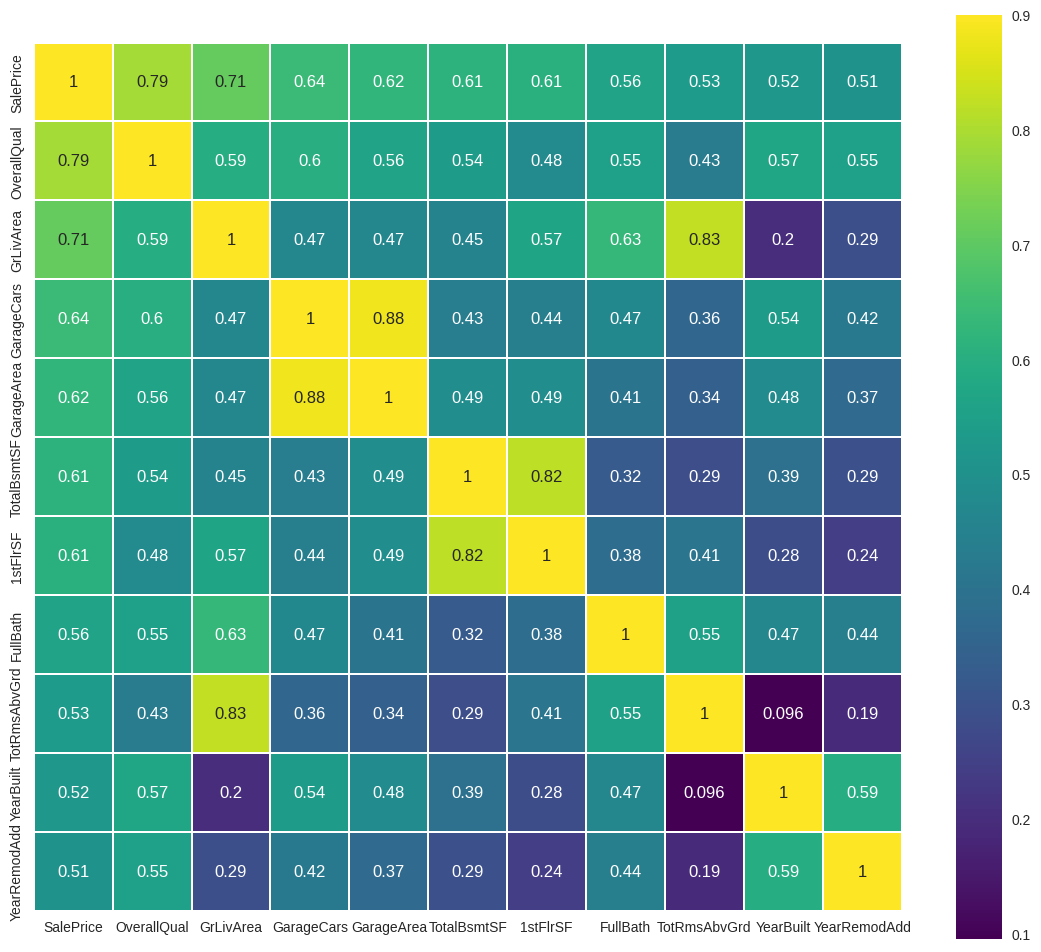

In [ ]:
k = 11
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm, vmax=.9, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor='white', xticklabels=cols.values, annot_kws={'size':12}, yticklabels=cols.values)

In [ ]:
df_train.nlargest(10,'SalePrice')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
692,60,RL,104.0,21535,Pave,No alley,IR1,Lvl,AllPub,Corner,...,0,No pool,No fence,No misc feature,0,1,2007,WD,Normal,755000
1183,60,RL,160.0,15623,Pave,No alley,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,No misc feature,0,7,2007,WD,Abnorml,745000
1170,60,RL,118.0,35760,Pave,No alley,IR1,Lvl,AllPub,CulDSac,...,0,No pool,No fence,No misc feature,0,7,2006,WD,Normal,625000
899,20,RL,100.0,12919,Pave,No alley,IR1,Lvl,AllPub,Inside,...,0,No pool,No fence,No misc feature,0,3,2010,New,Partial,611657
804,60,RL,107.0,13891,Pave,No alley,Reg,Lvl,AllPub,Inside,...,0,No pool,No fence,No misc feature,0,1,2009,New,Partial,582933
1047,60,RL,85.0,16056,Pave,No alley,IR1,Lvl,AllPub,Inside,...,0,No pool,No fence,No misc feature,0,7,2006,New,Partial,556581
441,20,RL,105.0,15431,Pave,No alley,Reg,Lvl,AllPub,Inside,...,0,No pool,No fence,No misc feature,0,4,2009,WD,Normal,555000
770,60,RL,47.0,53504,Pave,No alley,IR2,HLS,AllPub,CulDSac,...,0,No pool,No fence,No misc feature,0,6,2010,WD,Normal,538000
179,20,RL,63.0,17423,Pave,No alley,IR1,Lvl,AllPub,CulDSac,...,0,No pool,No fence,No misc feature,0,7,2009,New,Partial,501837


Columns to drop

In [ ]:
coltodrop = list(set(numeric).difference(cols))

In [ ]:
df=df_train.drop(coltodrop, axis=1)
df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,No alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,548,TA,TA,Y,No pool,No fence,No misc feature,WD,Normal,208500
2,RL,Pave,No alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,460,TA,TA,Y,No pool,No fence,No misc feature,WD,Normal,181500
3,RL,Pave,No alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,608,TA,TA,Y,No pool,No fence,No misc feature,WD,Normal,223500
4,RL,Pave,No alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,642,TA,TA,Y,No pool,No fence,No misc feature,WD,Abnorml,140000
5,RL,Pave,No alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,836,TA,TA,Y,No pool,No fence,No misc feature,WD,Normal,250000


In [ ]:
df.shape

(1460, 54)

Modelling

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
x = df.drop('SalePrice', axis=1) #independent/feature
y = df['SalePrice'] #dependent/label

In [ ]:
numcols =['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt','YearRemodAdd']

Preprocessing pipelines

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('numerical', numerical_transformer, numcols),
    ('categorical', categorical_transformer, categoric)
])


Model Algorithm

In [ ]:
lr_pipeline =Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

dt_pipeline =Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])
rf_pipeline =Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=50, random_state=42))
])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
lr_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['OverallQual', 'GrLivArea',
                                                   'GarageCars', 'GarageArea',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   'FullBath', 'TotRmsAbvGrd',
                                                   'YearBuilt',
                                                   'YearRemodAdd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model', LinearRegression())])

In [ ]:
dt_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['OverallQual', 'GrLivArea',
                                                   'GarageCars', 'GarageArea',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   'FullBath', 'TotRmsAbvGrd',
                                                   'YearBuilt',
                                                   'YearRemodAdd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model', DecisionTreeRegressor())])

In [ ]:
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['OverallQual', 'GrLivArea',
                                                   'GarageCars', 'GarageArea',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   'FullBath', 'TotRmsAbvGrd',
                                                   'YearBuilt',
                                                   'YearRemodAdd']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='...
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

Model Evaluation

In [ ]:
y_pred = lr_pipeline.predict(x_test)

rsquared=r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=mean_squared_error(y_test, y_pred, squared=False)
print('Linear Regression Algorithm')
print('R2 score:', rsquared)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)


Linear Regression Algorithm
R2 score: 0.8692282740634595
Mean Squared Error: 1003061796.6101393
Mean Absolute Error: 20550.434946447374
Root Mean Squared Error: 31671.1508570519


In [ ]:
y_pred_dt = dt_pipeline.predict(x_test)

rsquared_dt=r2_score(y_test, y_pred_dt)
mse_dt=mean_squared_error(y_test, y_pred_dt)
mae_dt=mean_absolute_error(y_test, y_pred_dt)
rmse_dt=mean_squared_error(y_test, y_pred_dt, squared=False)
print('Decision Tree Algorithm')
print('R2 score:', rsquared_dt)
print('Mean Squared Error:', mse_dt)
print('Mean Absolute Error:', mae_dt)
print('Root Mean Squared Error:', rmse_dt)

Decision Tree Algorithm
R2 score: 0.7453746540213703
Mean Squared Error: 1953059464.2739725
Mean Absolute Error: 27882.075342465752
Root Mean Squared Error: 44193.432365838846


In [ ]:
y_pred_rf = rf_pipeline.predict(x_test)

rsquared_rf=r2_score(y_test, y_pred_rf)
mse_rf=mean_squared_error(y_test, y_pred_rf)
mae_rf=mean_absolute_error(y_test, y_pred_rf)
rmse_rf=mean_squared_error(y_test, y_pred_rf, squared=False)
print('Random Forest Regression Algorithm')
print('R2 score:', rsquared_rf)
print('Mean Squared Error:', mse_rf)
print('Mean Absolute Error:', mae_rf)
print('Root Mean Squared Error:', rmse_rf)

Random Forest Regression Algorithm
R2 score: 0.8650781780917486
Mean Squared Error: 1034894386.504295
Mean Absolute Error: 18783.53418460535
Root Mean Squared Error: 32169.774424205945


In [ ]:
comparison = pd.DataFrame({'Real Price': y_test, 'LR Predict': y_pred, 'DT Predict': y_pred_dt, 'RF Predict':y_pred_rf})

In [ ]:
comparison.head(10)

,Real Price,LR Predict,DT Predict,RF Predict
Id,,,,
893,154500,137474.00,139400.0,137474.00
1106,325000,342191.58,350000.0,342191.58
414,115000,120480.00,110500.0,120480.00
523,159000,156577.00,220000.0,156577.00
1037,315500,325306.88,374000.0,325306.88
615,75500,86048.00,80000.0,86048.00
219,311500,200649.56,201800.0,200649.56
1161,146000,152346.00,129500.0,152346.00
650,84500,86678.00,80000.0,86678.00


Data Test Prediction

In [ ]:
df_test = pd.read_csv('test.csv', index_col='Id')
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_test_norm = df_test.drop(coltodrop, axis=1)

In [ ]:
ytest_pred = lr_pipeline.predict(df_test_norm)
ytest_pred_dt = dt_pipeline.predict(df_test_norm)
ytest_pred_rf = rf_pipeline.predict(df_test_norm)

In [ ]:
df_test['LR Predict']= ytest_pred.astype(int)
df_test['DT Predict']= ytest_pred_dt.astype(int)
df_test['RF Predict']= ytest_pred_rf.astype(int)

In [ ]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LR Predict,DT Predict,RF Predict
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,MnPrv,NaN,0,6,2010,WD,Normal,112893,125000,123375
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,Gar2,12500,6,2010,WD,Normal,162007,148000,149366
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,MnPrv,NaN,0,3,2010,WD,Normal,186089,157500,170182
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,6,2010,WD,Normal,191796,193000,196856
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,NaN,NaN,0,1,2010,WD,Normal,215770,245500,213065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,6,2006,WD,Normal,56886,83500,89448
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,4,2006,WD,Abnorml,92349,83500,92702
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2006,WD,Abnorml,152802,164900,148021
